
Random Forest Evaluation (Raw Features Only):
  MSE: 149.0392
  R²:  0.9694

Updated 'test_eigen_data.csv' with predictions.


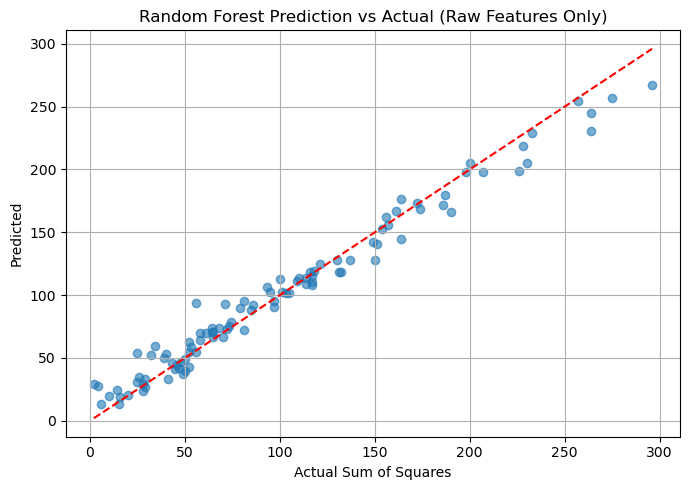

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_eigen_data.csv')
test_df = pd.read_csv('test_eigen_data.csv')

X_train = train_df[['a', 'b', 'c', 'd']]
y_train = train_df['sum_squared']

X_test = test_df[['a', 'b', 'c', 'd']]
y_true = test_df['sum_squared']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nRandom Forest Evaluation (Raw Features Only):")
print(f"  MSE: {mse:.4f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_eigen_data.csv', index=False)
print("\nUpdated 'test_eigen_data.csv' with predictions.")

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Random Forest Prediction vs Actual (Raw Features Only)")
plt.grid(True)
plt.tight_layout()
plt.show()  


Random Forest Model Evaluation:
  MSE: 14.3397
  R²:  0.9971

Updated 'test_eigen_data.csv' with Random Forest predictions.


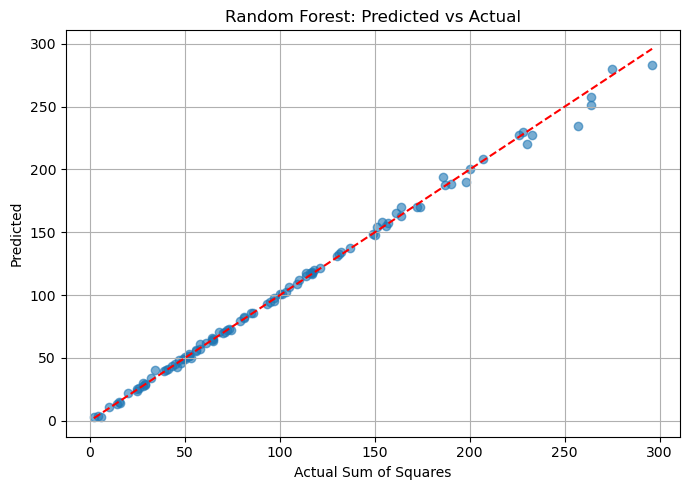

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_eigen_data.csv')
test_df = pd.read_csv('test_eigen_data.csv')

for df in [train_df, test_df]:
    df['trace'] = df['a'] + df['d']
    df['det'] = df['a'] * df['d'] - df['b'] * df['c']
    df['sym_score'] = abs(df['b'] - df['c'])

feature_cols = ['a', 'b', 'c', 'd', 'trace', 'det', 'sym_score']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']

X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("\nRandom Forest Model Evaluation:")
print(f"  MSE: {mse:.4f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_eigen_data.csv', index=False)
print("\nUpdated 'test_eigen_data.csv' with Random Forest predictions.")

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()